<div style="text-align: center; font-family: Trebuchet MS;  padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 36px">Udemy Courses Analysis</div>

<div style="text-align: left; background-color: #800080 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px">Preface</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
<p>As a consistent fan of online learning, I remain deeply appreciative of the opportunities it has afforded me to cultivate and enrich my skill set. Having taken numerous online courses myself, I find myself curious regarding the empirical data surrounding the courses available on Udemy. Accordingly, I have created a quick project that is designed to develop my skills and experience in data cleaning, manipulation, and visualization with the use of Python. With this project, I also intend to broaden my understanding of the Udemy platform, exploring its trends, courses, and user preferences in greater depth.</p>

<div style="text-align: left; background-color: #800080 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px">Dataset Used</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
<p>For the purpose of my analysis, I have obtained a publicly available dataset from Kaggle which offers a comprehensive account of every available Udemy course as of October 10, 2022. The dataset boasts a lot of useful information, including average course ratings, subscriber counts, categorical classifications, and a variety of other interesting factors.</p>

<div style="text-align: left; background-color: #800080 ; font-family: Trebuchet MS; color: white; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px">What Are The Goals Of This Project?</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
<p>The goal of this project is is to understand the patterns and trends in online course consumption, where we can get insights on what are the preferences of the students purchasing Udemy courses. Such insights may, in turn, inform the decision-making processes of individuals who are interested in creating courses on the Udemy platform. Specifically, by analyzing these trends, it may be possible to ascertain which topics or niches are likely to yield the greatest demand and interest among potential students. Specifically, we aim to answer the questions:</p>
<div>
<ul>
<li>What are the most popular courses on Udemy?</li>
<li>What are the most popular topics and their ratings?</li>
<li>Is there a correlation with average rating and subscriber numbers?</li>
<li>Are there any other significant correlations?</li>
</ul>
</div>

#### Questions
- Is there a correlation with number of lectures with average rating and subscriber numbers? ⭐
- What are the top selling categories and topics ⭐ and yung distribution of categories among them? 
- What categories have the most amounT of subscribers ⭐ (What are the most popular topics and categoriees) 
- Average/mean of subscribers for each category ⭐
- What is the average course rating across udemy versus course rating for tech category and topic 
- Is there a relationship between number of lectures or content length with average rating? ⭐
- Is there a correlation with number of reviews vs average rating? 
- Is there a correlation with price and rating ⭐

Ask gpt possible explanations for correlation scores mo between items

##### Importing The Libraries And Data

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('Course_info.csv')
data.head()

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url
0,4715.0,Online Vegan Vegetarian Cooking School,True,24.99,Learn to cook delicious vegan recipes. Filmed ...,2231.0,3.75,134.0,42.0,37.0,1268.0,2010-08-05T22:06:13Z,2020-11-06,Lifestyle,Food & Beverage,Vegan Cooking,English,/course/vegan-vegetarian-cooking-school/,Angela Poch,/user/angelapoch/
1,1769.0,The Lean Startup Talk at Stanford E-Corner,False,0.00,Debunking Myths of Entrepreneurship A startup ...,26474.0,4.50,709.0,112.0,9.0,88.0,2010-01-12T18:09:46Z,NaN,Business,Entrepreneurship,Lean Startup,English,/course/the-lean-startup-debunking-myths-of-en...,Eric Ries,/user/ericries/
2,5664.0,"How To Become a Vegan, Vegetarian, or Flexitarian",True,19.99,Get the tools you need for a lifestyle change ...,1713.0,4.40,41.0,13.0,14.0,82.0,2010-10-13T18:07:17Z,2019-10-09,Lifestyle,Other Lifestyle,Vegan Cooking,English,/course/see-my-personal-motivation-for-becomin...,Angela Poch,/user/angelapoch/
3,7723.0,How to Train a Puppy,True,199.99,Train your puppy the right way with Dr. Ian Du...,4988.0,4.80,395.0,88.0,36.0,1511.0,2011-06-20T20:08:38Z,2016-01-13,Lifestyle,Pet Care & Training,Pet Training,English,/course/complete-dunbar-collection/,Ian Dunbar,/user/ian-dunbar/
4,8157.0,Web Design from the Ground Up,True,159.99,Learn web design online: Everything you need t...,1266.0,4.75,38.0,12.0,38.0,569.0,2011-06-23T18:31:20Z,NaN,Design,Web Design,Web Design,English,/course/web-design-from-the-ground-up/,E Learning Lab,/user/edwin-ang-2/


##### Data Cleaning

- I decided to only keep the paid courses, as later on, we will be checking what are the most purchased courses on the platform.
- We will also be removing duplicate items and columns that won't necessarily be used such as the link to the courses and instructor accounts.

In [3]:
data.drop_duplicates(inplace=True)
data.drop(['course_url','headline','instructor_url','last_update_date','id'], axis=1, inplace=True)
data.drop(data[data['is_paid'] == False].index, inplace=True)
data.head()

,title,is_paid,price,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,category,subcategory,topic,language,instructor_name
0,Online Vegan Vegetarian Cooking School,True,24.99,2231.0,3.75000,134.0,42.0,37.0,1268.0,2010-08-05T22:06:13Z,Lifestyle,Food & Beverage,Vegan Cooking,English,Angela Poch
2,"How To Become a Vegan, Vegetarian, or Flexitarian",True,19.99,1713.0,4.40000,41.0,13.0,14.0,82.0,2010-10-13T18:07:17Z,Lifestyle,Other Lifestyle,Vegan Cooking,English,Angela Poch
3,How to Train a Puppy,True,199.99,4988.0,4.80000,395.0,88.0,36.0,1511.0,2011-06-20T20:08:38Z,Lifestyle,Pet Care & Training,Pet Training,English,Ian Dunbar
4,Web Design from the Ground Up,True,159.99,1266.0,4.75000,38.0,12.0,38.0,569.0,2011-06-23T18:31:20Z,Design,Web Design,Web Design,English,E Learning Lab
5,14-Day Yoga Detox and Empowerment Course,True,29.99,20505.0,4.53012,796.0,135.0,31.0,1163.0,2011-07-15T04:13:24Z,Health & Fitness,Yoga,Yoga,English,Sadie Nardini


##### What are the categories and topics?

In [10]:
subcategories = data.subcategory.unique()
len(subcategories) # There are 130 unique subcategories

130

#### Best Selling Courses

In [23]:
indiv_best_courses = data.sort_values("num_subscribers", ascending=False)
top20courses = indiv_best_courses.head(20)[["title", "topic","num_subscribers","avg_rating","published_time"]]
print(top20courses)

                                                   title              topic  \
10724  2022 Complete Python Bootcamp From Zero to Her...             Python   
16288  Microsoft Excel - Excel from Beginner to Advanced              Excel   
10174  Automate the Boring Stuff with Python Programming             Python   
20252  Machine Learning A-Z™: Hands-On Python & R In ...             Python   
12120                    The Web Developer Bootcamp 2022    Web Development   
39113         The Complete 2022 Web Development Bootcamp    Web Development   
9965   Java Programming Masterclass covering Java 11 ...               Java   
19303  The Complete Digital Marketing Course - 12 Cou...  Digital Marketing   
17800  The Complete JavaScript Course 2022: From Zero...         JavaScript   
60269  Ultimate AWS Certified Solutions Architect Ass...  AWS Certification   
32275  React - The Complete Guide (incl Hooks, React ...           React JS   
84101  100 Days of Code: The Complete Python Pro Boo

Text(0.5, 1.0, 'Topics Of The 20 Most Popular Courses On Udemy')

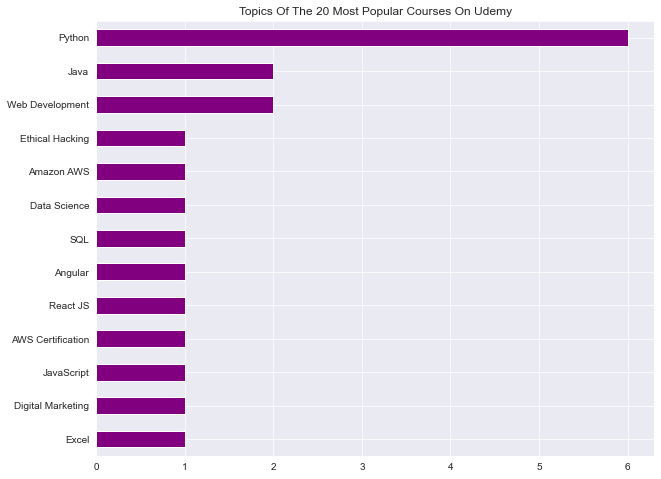

In [12]:
topicdistribution = top20courses.topic.value_counts()
topicdistribution = topicdistribution.sort_values(ascending=True)

sns.set_style("darkgrid")
plt.figure(figsize = (10,8))
topicdistribution.plot(kind='barh',color='purple')
plt.title("Topics Of The 20 Most Popular Courses On Udemy")

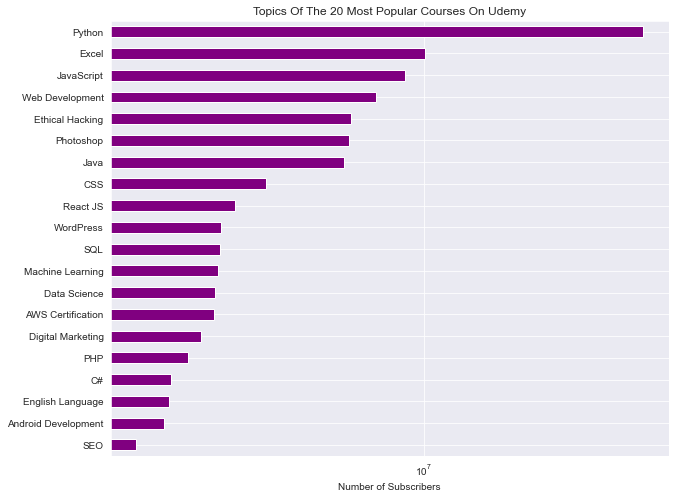

In [17]:
# we use sum as it represents how many times a course in that topic has been purchased
besttopics = data.groupby("topic")['num_subscribers'].sum().sort_values(ascending=False).head(20)
#most saught after topics always involve technology
# Sort the series in descending order
besttopics = besttopics.sort_values(ascending=True)

plt.figure(figsize=(10, 8))
besttopics.plot(kind='barh', color='purple')
plt.title("Topics Of The 20 Most Popular Courses On Udemy")
plt.xlabel("Number of Subscribers")
plt.xscale('log')
plt.ylabel("")
plt.show()

# Show the plot
plt.show()

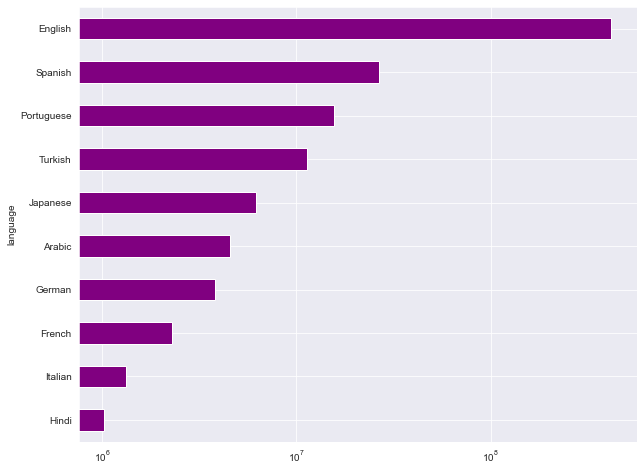

In [28]:
languages = data.groupby("language")['num_subscribers'].sum().sort_values(ascending=False).head(10)
languages = languages.sort_values(ascending=True)
plt.figure(figsize=(10, 8))
languages.plot(kind='barh', color='purple')
plt.xscale('log')

##### What are the best selling subcategories?

In [10]:
bestsub = data.groupby("subcategory")['num_subscribers'].sum().sort_values(ascending=False)
print(bestsub.head(20))
#top 10 is still tech

subcategory
Web Development                      57091220.0
Programming Languages                44361412.0
Other IT & Software                  26230182.0
IT Certifications                    25190224.0
Network & Security                   19973986.0
Data Science                         19381917.0
Microsoft                            17390960.0
Language Learning                    12339923.0
Graphic Design & Illustration        10624837.0
Business Analytics & Intelligence    10441184.0
Mobile Development                   10215217.0
Entrepreneurship                      9031798.0
Design Tools                          8049930.0
Database Design & Development         7716001.0
Social Media Marketing                7323574.0
Digital Marketing                     7020320.0
Investing & Trading                   6710434.0
Operating Systems & Servers           6699070.0
Personal Transformation               6477552.0
Project Management                    6332245.0
Name: num_subscribers, dtype

##### Best selling topics

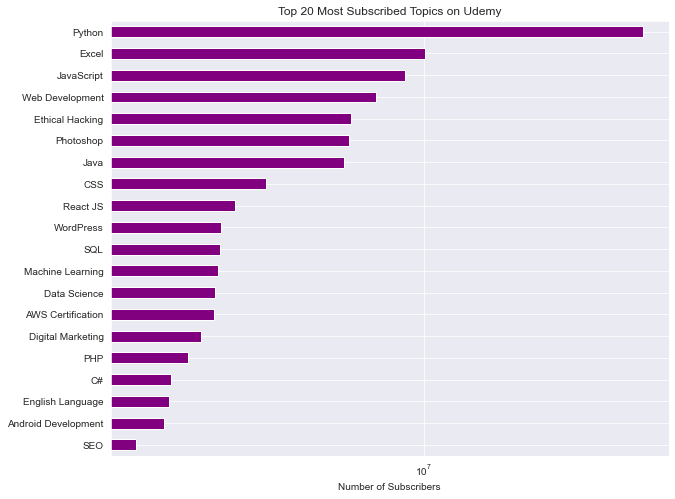

In [20]:
besttopics = data.groupby("topic")['num_subscribers'].sum().sort_values(ascending=False).head(20)
besttopics = besttopics.sort_values(ascending=True)

# Create a horizontal bar plot of topics
plt.figure(figsize = (10,8))
besttopics.plot(kind='barh',color='purple')

# Add chart title and axis labels
plt.title("Top 20 Most Subscribed Topics on Udemy")
plt.xlabel("Number of Subscribers")
plt.xscale('log')
plt.ylabel("")

# Show the plot
plt.show()

##### Worst selling topics

In [23]:
# not sure if its super valid
worsttopics = data.groupby("topic")['num_subscribers'].sum().sort_values(ascending=True)
worsttopics.head(20)

topic
Oracle 1Z0-932                      0.0
ITIL v3 Certification               0.0
HTML Attribute                      0.0
Security Communication              0.0
Web Browser                         0.0
Oracle 1Z0-997-21 (Retired Exam)    0.0
Microsoft MB-500                    0.0
Microsoft AZ-600                    0.0
Surgery Recovery                    0.0
Semantic HTML                       0.0
Polyglot Programming                1.0
Oracle 1Z0-1042-22                  1.0
AP Statistics                       1.0
Amazon Route 53                     1.0
Microsoft MB-230                    2.0
Microsoft MS-740                    3.0
Archery                             3.0
Oracle 1Z0-1067-22                  3.0
Windows Vista                       3.0
Oracle 1Z0-1105-22                  3.0
Name: num_subscribers, dtype: float64

#### Average user rating for each category

In [57]:
data.groupby("topic")['avg_rating'].mean().sort_values(ascending=False)

topic
Shakespeare                        5.0
Fantasy Basketball                 5.0
Hackathon                          5.0
Shopware                           5.0
Aspect-Oriented Programming        5.0
                                  ... 
Microsoft MS-600                   0.0
ITIL v3 Certification              0.0
Microsoft MB-500                   0.0
Microsoft MB-230                   0.0
Intelligent Workload Management    0.0
Name: avg_rating, Length: 3803, dtype: float64

topic
Java                 4.381979
Digital Marketing    4.510407
Python               4.551679
Ethical Hacking      4.629154
Data Science         4.645129
Angular              4.646908
React JS             4.648803
SQL                  4.672471
Excel                4.689838
Web Development      4.703494
AWS Certification    4.712643
JavaScript           4.745153
Amazon AWS           4.758728
Name: avg_rating, dtype: float64


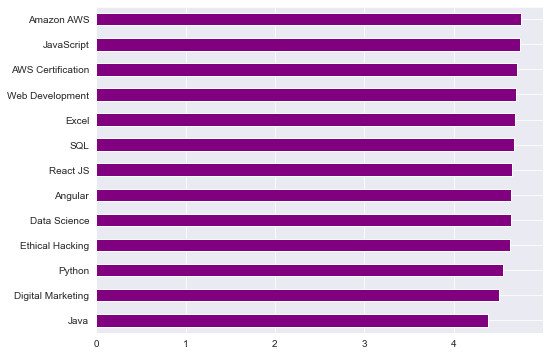

In [56]:
top20ratings = top20courses.groupby("topic")['avg_rating'].mean().sort_values(ascending=True)
plt.figure(figsize = (8,6))
print(top20ratings)
top20ratings.plot(kind='barh',color='purple')
plt.ylabel("")
plt.show()

Correlation: 0.05547846021161356


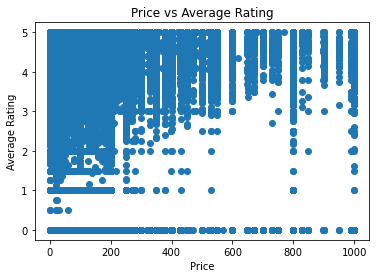

In [54]:
#why did i try this? to see if there was a correlation between price and rating score
#the marketing phenmenon of when people spend more money on something, they tend to like it more
corr_pricexrating = data['price'].corr(data['avg_rating'])
print("Correlation: " + str(corr_pricexrating))
#plotting the data
plt.scatter(data['price'], data['avg_rating'])
plt.xlabel('Price')
plt.ylabel('Average Rating')
plt.title('Price vs Average Rating')
plt.show()

Correlation: 0.04571540821011597


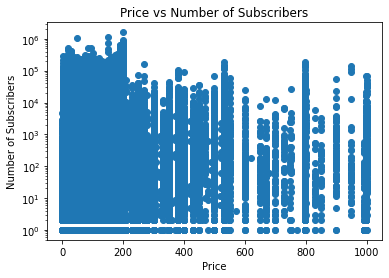

In [55]:
#wanted to check if you increase price, you get more subscribers
corr_pricexsubs = data['price'].corr(data['num_subscribers'])
print("Correlation: " + str(corr_pricexsubs))
#Plotting the data
plt.scatter(data['price'],data['num_subscribers'])
plt.xlabel('Price')
plt.ylabel('Number of Subscribers')
plt.xscale('linear') 
plt.yscale('log')  
plt.title('Price vs Number of Subscribers')
plt.show()

Correlation: 0.12303086354299124


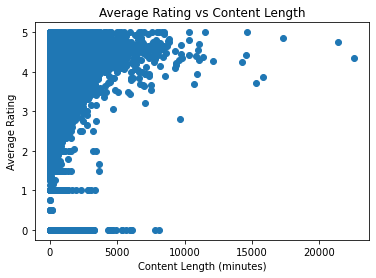

In [64]:
corr_ratingxlength = data['avg_rating'].corr(data['content_length_min'])
print("Correlation: " + str(corr_ratingxlength))
#plot the data with a scatter plot
plt.scatter(data['content_length_min'],data['avg_rating'])
plt.ylabel('Average Rating')
plt.xlabel('Content Length (minutes)')
plt.title('Average Rating vs Content Length')
plt.show()


Correlation: 0.16226576659449396


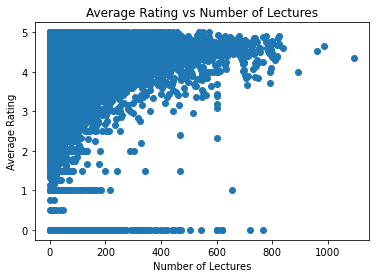

In [63]:
corr_ratingxlectures = data['avg_rating'].corr(data['num_lectures'])
print("Correlation: " + str(corr_ratingxlectures))
#plot the data with a scatter plot
plt.scatter(data['num_lectures'],data['avg_rating'])
plt.ylabel('Average Rating')
plt.xlabel('Number of Lectures')
plt.title('Average Rating vs Number of Lectures')
plt.show()

Correlation: 0.1423731933381653


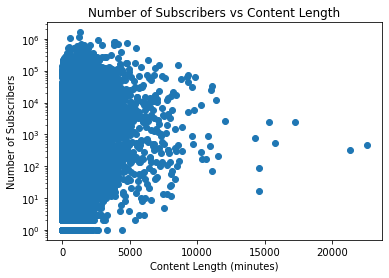

In [66]:
corr_subsxlength = data['num_subscribers'].corr(data['content_length_min'])
print("Correlation: " + str(corr_subsxlength))
#plot the data with a scatter plot
plt.scatter(data['content_length_min'],data['num_subscribers'])
plt.yscale('log')
plt.xscale('linear')
plt.ylabel('Number of Subscribers')
plt.xlabel('Content Length (minutes)')
plt.title('Number of Subscribers vs Content Length')
plt.show()

Correlation: 0.21314623911094746


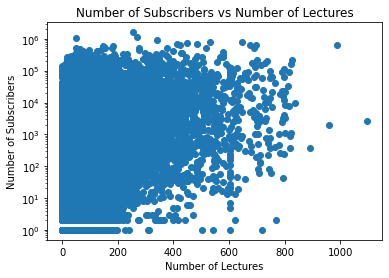

In [15]:
corr_subsxlec = data['num_lectures'].corr(data['num_subscribers'])
print("Correlation: " + str(corr_subsxlec))
#plot the data with a scatter plot
plt.scatter(data['num_lectures'],data['num_subscribers'])
plt.yscale('log')
plt.xscale('linear')
plt.ylabel('Number of Subscribers')
plt.xlabel('Number of Lectures')
plt.title('Number of Subscribers vs Number of Lectures') 
plt.show()


Correlation: 0.07490687768355146


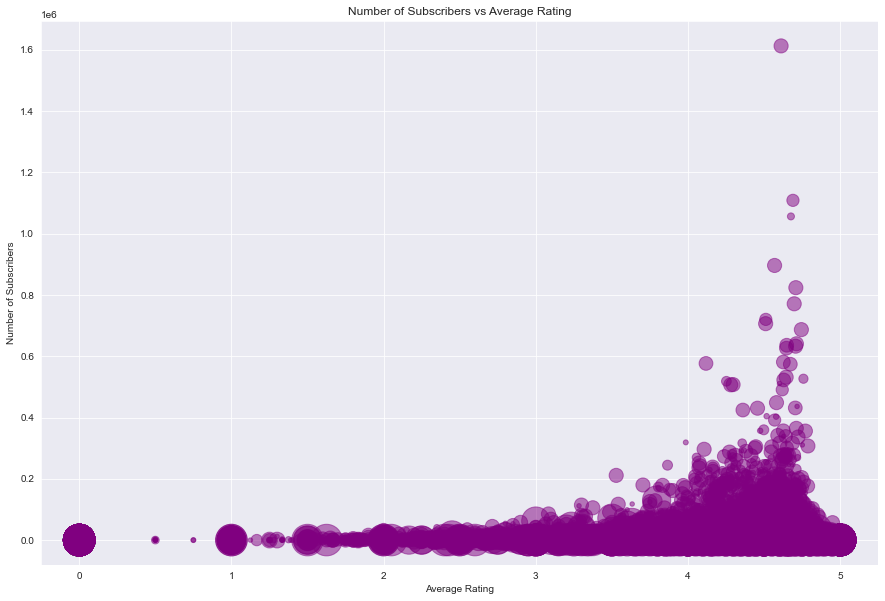

In [47]:
corr_ratingxsubs = data['num_subscribers'].corr(data['avg_rating'])
print("Correlation: " + str(corr_ratingxsubs))
#plot the data with a scatter plot
plt.figure(figsize = (15,10))
plt.scatter(data['avg_rating'],data['num_subscribers'], s = data['price'],alpha=0.5, c="purple")
plt.ylabel('Number of Subscribers')
plt.xlabel('Average Rating')
plt.title('Number of Subscribers vs Average Rating')
plt.show()


Correlation: 0.047630763589397114


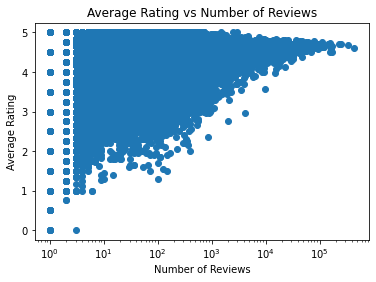

In [17]:
corr_numreviewsxrating = data['avg_rating'].corr(data['num_reviews'])
print("Correlation: " + str(corr_numreviewsxrating))
#plot the data with a scatter plot
plt.scatter(data['num_reviews'],data['avg_rating'])
plt.yscale('linear')
plt.xscale('log')
plt.ylabel('Average Rating')
plt.xlabel('Number of Reviews')
plt.title('Average Rating vs Number of Reviews')
plt.show()

##### Mean Price

In [86]:
print(data['price'].mean())

data.groupby("category")['price'].mean().sort_values(ascending=False)

91.10852411767833


category
Development             105.304997
Finance & Accounting     98.663169
Marketing                96.418639
Business                 95.108352
Design                   93.506561
Personal Development     92.632640
Office Productivity      90.472751
Photography & Video      87.928228
Teaching & Academics     86.856979
IT & Software            83.486441
Music                    82.484756
Lifestyle                76.809300
Health & Fitness         75.771732
Name: price, dtype: float64

In [45]:
data["published_time"] = pd.to_datetime(data["published_time"])
print(data["published_time"].head())

0   2010-08-05 22:06:13+00:00
2   2010-10-13 18:07:17+00:00
3   2011-06-20 20:08:38+00:00
4   2011-06-23 18:31:20+00:00
5   2011-07-15 04:13:24+00:00
Name: published_time, dtype: datetime64[ns, UTC]


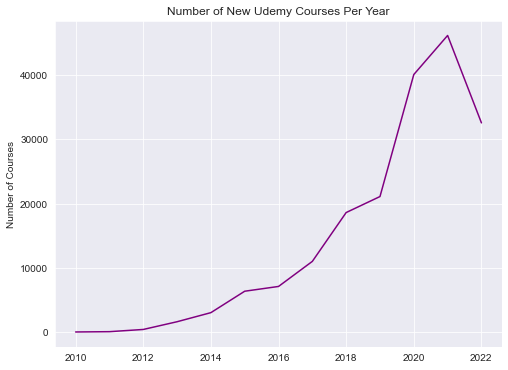

In [53]:
data["year"] = pd.to_datetime(data["published_time"]).dt.year

# Count the number of courses for each year
year_counts = data["year"].value_counts()

# Sort the counts by year
year_counts = year_counts.sort_index()

# Plot the counts as a line graph
plt.figure(figsize = (8,6))
sns.set_style('darkgrid')
sns.lineplot(data=year_counts, color="purple")

# Add chart title and axis labels
plt.title("Number of New Udemy Courses Per Year")
plt.xlabel("")
plt.ylabel("Number of Courses")

# Show the plot
plt.show()

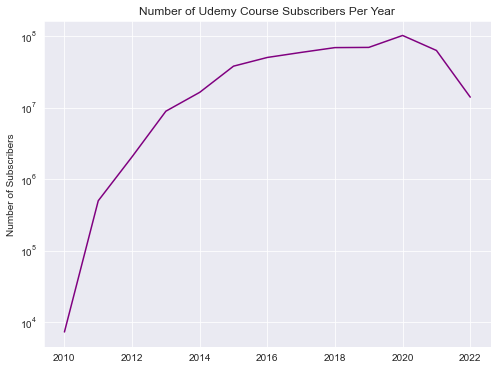

In [49]:
# Group the data by year and sum the number of subscribers
subscribers_by_year = data.groupby("year")["num_subscribers"].sum()

# Plot the subscribers as a line graph
plt.figure(figsize = (8,6))
sns.lineplot(x=subscribers_by_year.index, y=subscribers_by_year.values, color="purple")
# Add chart title and axis labels
plt.title("Number of Udemy Course Subscribers Per Year")
plt.xlabel("")
plt.yscale('log')
plt.ylabel("Number of Subscribers")

# Show the plot
plt.show()

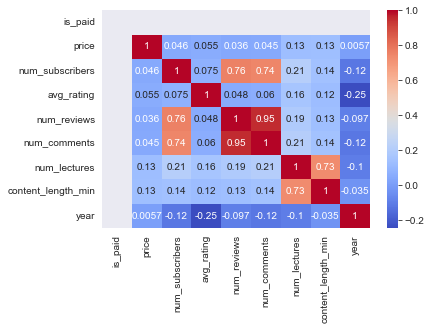

In [58]:
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

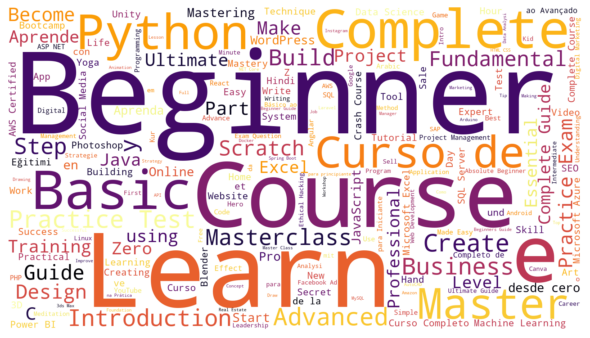

In [72]:
from wordcloud import WordCloud
# Combine all titles into a single string
titles = ' '.join(data['title'])

# Create a WordCloud object
wordcloud = WordCloud(width=1600, height=900, background_color='white', colormap = plt.cm.inferno, min_font_size=10).generate(titles)

# Display the generated image
plt.figure(figsize=(8, 8), facecolor=None)
sns.set_style("whitegrid")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

# Show the plot
plt.show()

In [21]:
#### check the languages